In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Weights algorithm as provided by Professor Wright

def weights(z, x, m):
    """
    weights(z, x, m)

    Calculates finite difference weights of up to order m.

    Implements Fornberg's algorithm.

    ARGS:
        z : Location where approximations are to be accurate
        x : Vector with x-coordinates for the grid points
        m : Highest derivative that we want to find weights for

    RETURNS:
        c : Array of size [m+1, len(x)] containing (as output) in successive rows the weights for derivatives 0, 1, ..., m.

    EXAMPLE:
        To generate the 2nd order centered FD formula for the zeroth, first and second derivative, we make the following call to weights:
        c = weights(0, [-1, 0, 1], 2)

    (c) Translated by Andrew Jones from the original source by Fornberg
    """
    import numpy as np

    n = len(x)
    c = np.zeros((m+1, n))
    c1, c4 = 1, x[0] - z
    c[0,0] = 1
    for i in range(1,n):
        mn = min(i+1, m+1)
        c2, c4, c5 = 1, x[i]-z, c4
        for j in range(0, i):
            c3 = x[i] - x[j]
            c2 *= c3
            if j==i-1:
                c[1:mn,i] = c1/c2 *(np.arange(1,mn)*c[0:mn-1,i-1] - c5*c[1:mn, i-1])
                c[0,i] = -c1*c5/c2 * c[0,i-1]
            c[1:mn,j] = (c4*c[1:mn,j] - np.arange(1,mn)*c[0:mn-1,j])/c3
            c[0,j] *= c4/c3
        c1 = c2
    return c


In [12]:
# Initializing the nodal sets
j=arange(0,15)
x_j1 = array([(-1+(2*x)/14) for x in j] )    #equispaced
x_j2 = -cos((j*pi)/14)   #Chebyshev
x_j3 = array([-0.987992518020485,-0.937273392400706,-0.848206583410427,-0.724417731360170,-0.570972172608539,-0.394151347077563,-0.201194093997435,0,0.201194093997435,0.394151347077563,0.570972172608539,0.724417731360170,0.848206583410427,0.937273392400706,0.987992518020485])                 # Legendre

<IPython.core.display.Javascript object>


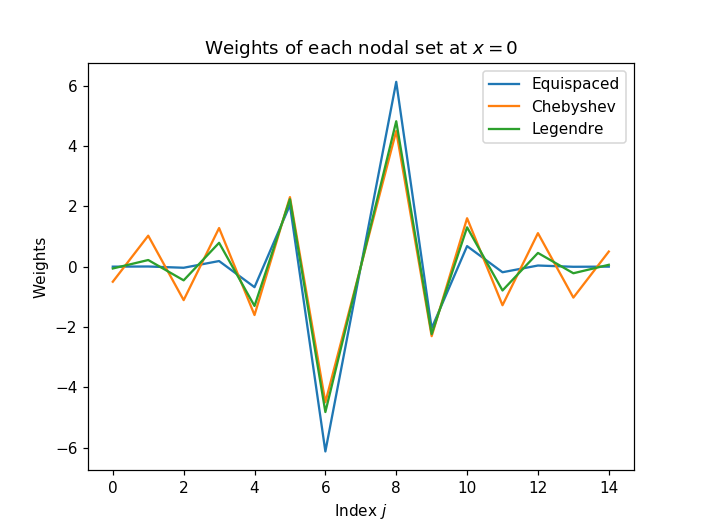

In [15]:
# Using function weights to calculate nodal sets for each nodal set at x=0

equi_0 = weights(0, x_j1, 1)
cheb_0 = weights(0, x_j2, 1)
Legr_0 = weights(0, x_j3, 1)

#Ploting each nodal set of weight for x=0

figure()
plot(j, equi_0[1], label="Equispaced")
plot(j, cheb_0[1], label="Chebyshev")
plot(j, Legr_0[1], label="Legendre")
title(r"Weights of each nodal set at $x=0$")
xlabel(r'Index $j$')
ylabel("Weights")
legend()
show()


In [14]:
equi_0[1]
cheb_0[1]
Legr_0[1]

array([-6.09296583e-02,  2.19199848e-01, -4.54170017e-01,  7.89875237e-01,
       -1.30263141e+00,  2.23522874e+00, -4.81860018e+00,  4.49486410e-16,
        4.81860018e+00, -2.23522874e+00,  1.30263141e+00, -7.89875237e-01,
        4.54170017e-01, -2.19199848e-01,  6.09296583e-02])

<IPython.core.display.Javascript object>


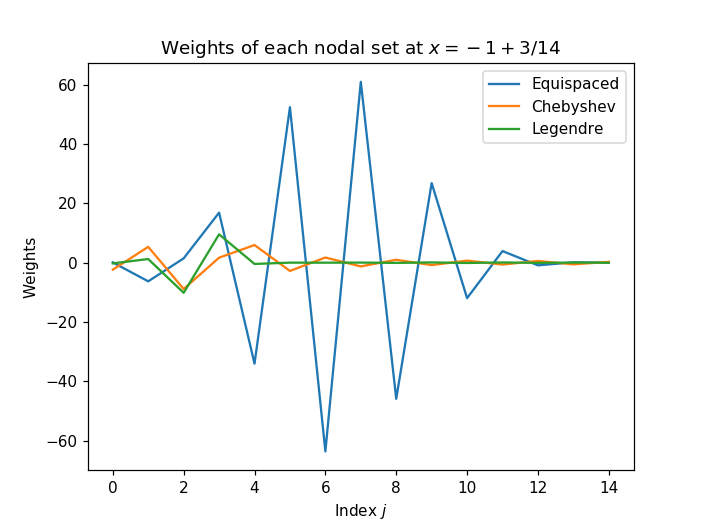

In [5]:
# Using function weights to calculate nodal sets for each nodal set at x=-1+3/14

equi_1 = weights(-1+3/14, x_j1, 1)
cheb_1 = weights(-1+3/14, x_j2, 1)
Legr_1 = weights(-1+3/14, x_j3, 1)

#Ploting each nodal set of weight for x=0

figure()
plot(j, equi_1[1], label="Equispaced")
plot(j, cheb_1[1], label="Chebyshev")
plot(j, Legr_1[1], label="Legendre")
title(r"Weights of each nodal set at $x=-1+3/14$")
xlabel(r'Index $j$')
ylabel("Weights")
legend()
show()
